# DSCI 303 - Project 01
### Vincent Regazzi

In this project, we will create a linear regression model, and use it to predict the fuel economy (in miles per gallon) of a vehicle based on only the weight of the vehicle. Scatter plots will be made of the data, so that we can find a data set with a linear relationship so that we can use a linear model to understand the relationship between both variables. Our data set contains the information for each of the 398 vehicle models manufactured in 1983 concerning weight (pounds), average miles per gallon, and the natural logarithm of the average miles per gallon. The goal is to create a linear model that can be used to estimate the natural log of the average MPG for a vehicle.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Importing and Viewing the Data
In this part, we will be importing the data and then viewing it.

In [9]:
df = pd.read_table(filepath_or_buffer='auto_data.txt', sep='\t')
weight = list(df.wt)
mpg = list(df.mpg)
ln_mpg = list(df.ln_mpg)

We will now confirm that each list contains 398 values.

In [3]:
print(len(weight))
print(len(mpg))
print(len(ln_mpg))

398
398
398


Now, we will view the information for the first 10 vehicles in the dataset

In [4]:
print(f'{"Weight":>6}{"MPG":>8}{"LN_MPG":>10}')
print('-'*24)
for i in range(0, 10):
    print(f'{weight[i]:>6}{mpg[i]:>8}    {ln_mpg[i]:<06}')

Weight     MPG    LN_MPG
------------------------
  3190    27.2    3.3032
  1985    32.8    3.4904
  3410    18.1    2.8959
  4080    17.5    2.8622
  3530    25.4    3.2347
  1773    31.0    3.4340
  2670    27.4    3.3105
  1755    39.1    3.6661
  2188    34.3    3.5351
  2155    30.0    3.4012


Now, we are making two scatter plots. the first one is to explore the relationship between MPG and vehicle weight, and the second will explore the relationship between natural log of MPG and vehicle weight.

<function matplotlib.pyplot.show(close=None, block=None)>

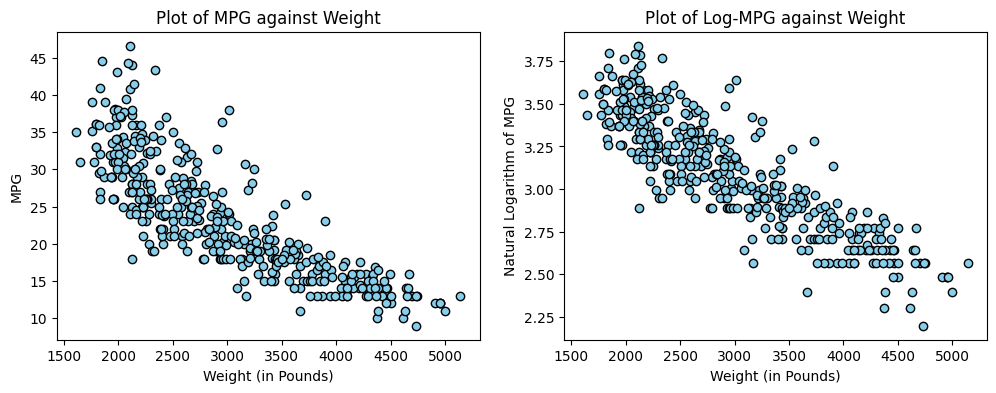

In [5]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(weight, mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('MPG')
plt.title('Plot of MPG against Weight')

plt.subplot(1,2,2)
plt.scatter(weight, ln_mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Plot of Log-MPG against Weight')
plt.show

The first graph has a curve, while the second shows a linear relationship. We are constructing a linear model, so we will use log-MPG as our response variable.

## Part 2: Splitting the Data
Now, we will be splitting the data into training and test sets.

In [6]:
x_train = weight[:300]
x_test = weight[300:]
y_train = ln_mpg[:300]
y_test = ln_mpg[300:]
mpg_train = mpg[:300]
mpg_test = mpg[300:]

n_train = len(x_train)
n_test = len(x_test)
print(f'Training Set Size: {n_train}')
print(f'Test Set Size:      {n_test}')

Training Set Size: 300
Test Set Size:      98


We will now create scatter plots to visualize the datat in the training and test sets.

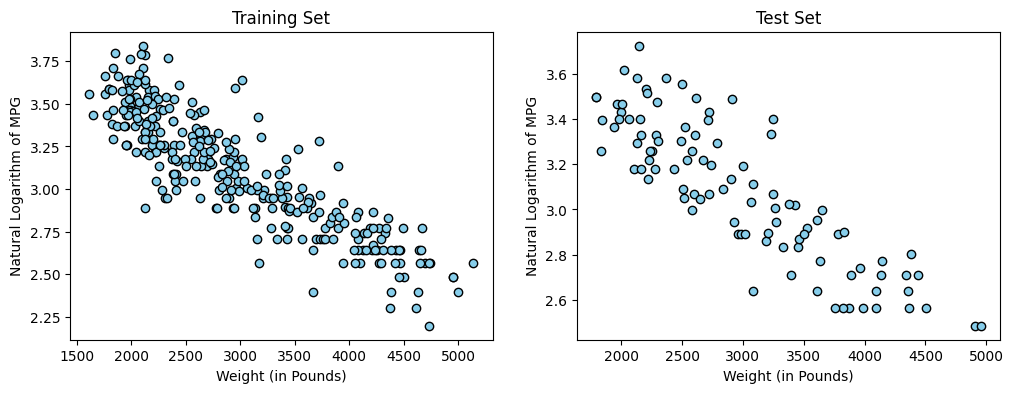

In [7]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Training Set')

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Test Set')
plt.show()

## Part 3: Descriptive Statistics
For this part of the project, we will start by calculating the mean of the X values (representing weight) and the mean of the Y values (representing log-MPG).

In [8]:
mean_x = sum(x_train)/len(x_train)
mean_y = sum(y_train)/len(y_train)
print(f'Mean of X = {round(mean_x, 2)}')
print(f'Mean of Y = {round(mean_y, 4)}')

Mean of X = 2968.62
Mean of Y = 3.1069


Now we we will be calculating the sum of squared deviations of both x and y.

In [9]:
Sxx = 0
Syy = 0

for i in range(0, len(x_train)):
    Sxx += (x_train[i] - mean_x) ** 2

for i in range(0, len(y_train)):
    Syy += (y_train[i] - mean_y) ** 2

print(f'Sxx = {round(Sxx, 2)}')
print(f'Syy = {round(Syy, 4)}')

Sxx = 224006920.44
Syy = 36.0746


We will now be calculating the variance of the training values of X and Y.

In [10]:
var_x = Sxx / (len(x_train) - 1)
var_y = Syy / (len(y_train) - 1)
print(f'Variance of X = {round(var_x, 2)}')
print(f'Variance of Y = {round(var_y, 4)}')

Variance of X = 749187.02
Variance of Y = 0.1207


## Part 4: Linear Regression Model
In this part, we will calculate Sxy, which we will use to find the coefficients for our linear regression model.

In [11]:
Sxy = 0
for k in range(0, len(x_train)):
    Sxy += (x_train[k] - mean_x) * (y_train[k] - mean_y)
print(f'Sxy = {round(Sxy, 2)}')

Sxy = -78999.13


We will now be calculating the coefficients of our model.

In [12]:
beta_1 = Sxy / Sxx
beta_0 = mean_y - beta_1 * mean_x
print(f'beta_0 = {round(beta_0, 4)}')
print(f'beta_1 = {round(beta_1, 8)}')

beta_0 = 4.1538
beta_1 = -0.00035266


We will now visualize the regresion line by plotting it on top of the scatter plots for the training set and the test set.

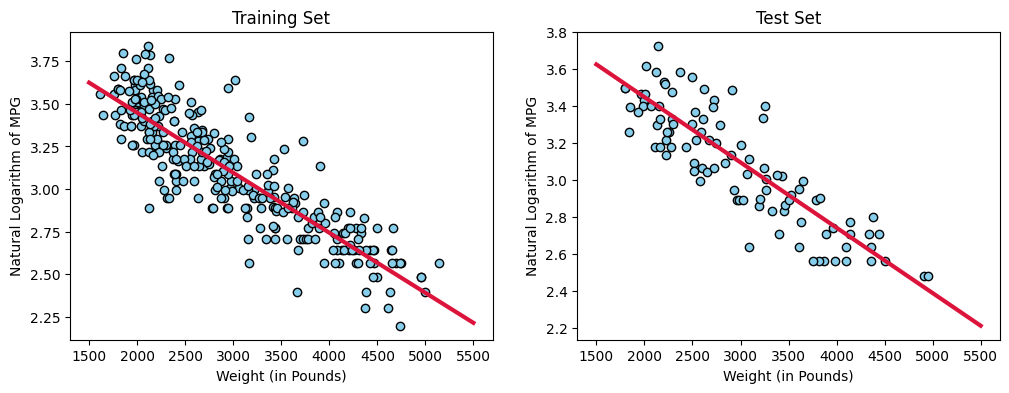

In [13]:
y_vals = [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5500]
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Training Set')

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Test Set')
plt.show()

## Part 5: Training Score
In this section, we will be calculating the training r-squared score, and we will start by calculating estimated response values for the training set.

In [14]:
pred_y_train = []
for i in range(0, len(x_train)):
    pred_y_train.append(beta_0 + beta_1 * x_train[i])

We will now calculate the residuals for the training set.

In [15]:
error_y_train = []
for i in range(0, len(pred_y_train)):
    error_y_train.append(y_train[i] - pred_y_train[i])

We will now display the first 10 values of y_train, pred_y_train, and error_y_train.

In [16]:
print(f'{"True y":>6}{"Pred y":>10}{"Error":>10}')
print('-'*26)
for i in range(0, 10):
    print(f'{round(y_train[i], 4):<06}    {round(pred_y_train[i], 4):<06}{round(error_y_train[i], 4):>10}')

True y    Pred y     Error
--------------------------
3.3032    3.0289    0.2743
3.4904    3.4538    0.0366
2.8959    2.9513   -0.0554
2.8622    2.7150    0.1472
3.2347    2.9089    0.3258
3.4340    3.5286   -0.0946
3.3105    3.2122    0.0983
3.6661    3.5349    0.1312
3.5351    3.3822    0.1529
3.4012    3.3939    0.0073


We will now calculate the sum of squared errors for the training set.

In [17]:
sse_train = 0
for i in range(0, len(error_y_train)):
    sse_train += error_y_train[i] ** 2
print(f'Training SSE = {round(sse_train, 4)}')

Training SSE = 8.2145


We will now calculate the r-squared score for the training set.

In [18]:
r2_train = 1 - (sse_train / Syy)
print(f'Training r-Squared = {round(r2_train, 4)}')

Training r-Squared = 0.7723


## Part 6: Test Score
In this section, we will be calculating the test r-squared score, and we will start by calculating estimated response values for the test set.

In [19]:
pred_y_test = []
for i in range(0, len(x_test)):
    pred_y_test.append(beta_0 + beta_1 * x_test[i])

We will now calculate the residuals for the test set.

In [20]:
error_y_test = []
for i in range(0, len(pred_y_test)):
    error_y_test.append(y_test[i] - pred_y_test[i])

We will now display the first 10 values of y_test, pred_y_test, and error_y_test.

In [21]:
print(f'{"True y":>6}{"Pred y":>10}{"Error":>10}')
print('-'*26)

temp_error_y_test_copy = error_y_test.copy()
for i in range(0, 10):
    if abs(temp_error_y_test_copy[i]) == temp_error_y_test_copy[i]:
        filler = ' '
    else:
        filler = '-'
        
    print(f'{round(y_test[i], 4):<06}    {round(pred_y_test[i], 4):<06}   {filler}{abs(round(error_y_test[i], 4)):<06}')

True y    Pred y     Error
--------------------------
2.6391    3.0655   -0.4264
2.8904    2.8190    0.0714
2.9957    2.8663    0.1294
2.5649    2.7890   -0.2241
2.9957    3.2433   -0.2476
2.9444    3.1205   -0.1761
2.4849    2.4237    0.0612
3.2581    3.3586   -0.1005
3.7257    3.3977    0.3280
2.5649    2.7474   -0.1825


We will now calculate the sum of squared errors for the training set.

In [22]:
sse_test = 0
for i in range(0, len(error_y_test)):
    sse_test += error_y_test[i] ** 2
print(f'Test SSE = {round(sse_test, 4)}')

Test SSE = 2.4848


We will now calculate the value of Syy on the test set, and wil then use that and the test sum of squared errors to calculate the test r-squared score.

In [23]:
mean_y_test = sum(y_test)/len(y_test)
Syy_test = 0
for i in range(0, len(y_test)):
    Syy_test += (y_test[i] - mean_y_test) ** 2

r2_test = 1 - (sse_test/Syy_test)
print(f'Test r-Squared = {round(r2_test, 4)}')

Test r-Squared = 0.7435


We will now create a lot to visualize the errors for the observations in the test set.

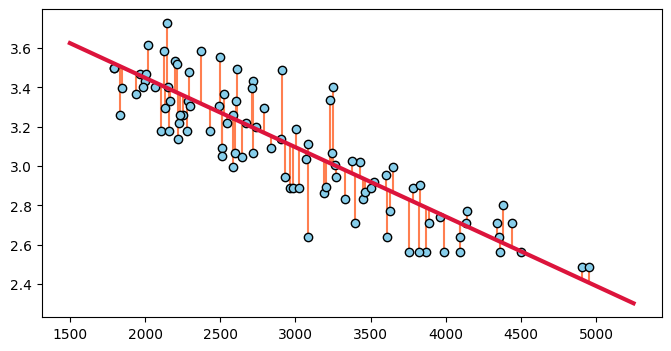

In [24]:
plt.figure(figsize=[8,4])
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5250], [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5250], c='crimson', lw=3)
for i in range(n_test):
    plt.plot([x_test[i], x_test[i]], [pred_y_test[i], y_test[i]], c='coral', zorder=0)
plt.show()

## Part 7: Transforming Test Predictions
We will be calculating estimates for the average MPG for observations in our test set.

In [25]:
e = 2.718281828
pred_mpg_test = []
for i in range(0, len(pred_y_test)):
    pred_mpg_test.append(e ** pred_y_test[i])

We will now calculate the error in each estimate for the average MPG.

In [26]:
error_mpg_test = []
for i in range(0, len(mpg_test)):
    error_mpg_test.append(mpg_test[i] - pred_mpg_test[i])

We will now display the true MPG, the estimated MPG, and the estimation error for each of the first 10 observations of each step.

In [27]:
print(f'{"True MPG":>8}{"Pred MPG":>12}{"Error":>9}')
print('-'*29)
for i in range(0,10):
    print(f'{round(mpg_test[i], 1):>8}{round(pred_mpg_test[i], 1):>12}{round(error_mpg_test[i], 1):>9}')

True MPG    Pred MPG    Error
-----------------------------
    14.0        21.4     -7.4
    18.0        16.8      1.2
    20.0        17.6      2.4
    13.0        16.3     -3.3
    20.0        25.6     -5.6
    19.0        22.7     -3.7
    12.0        11.3      0.7
    26.0        28.7     -2.7
    41.5        29.9     11.6
    13.0        15.6     -2.6
